# ARIMA MODEL


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [4]:
df1 = pd.read_csv("train_data.csv",index_col='Date', parse_dates=True)
df1


,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
...,...
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02


In [5]:
df1.head()
df1.isnull().sum()

Petrol (USD)    2
dtype: int64

In [6]:
df2 = df1.dropna()

In [7]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

C:\Users\PRATYAY\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Petrol
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28


<AxesSubplot:xlabel='Date'>

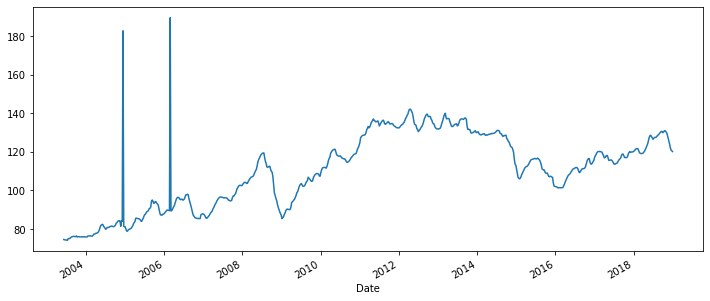

In [8]:
df2['Petrol'].plot(figsize=(12,5))

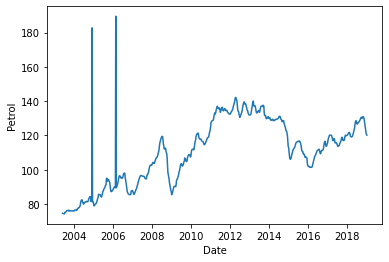

In [9]:
plt.xlabel('Date')
plt.ylabel('Petrol')
plt.plot(df2)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-value:",dftest[1])
    print("3.No of Lags",dftest[2])
    print("4.no of observation used for ADF Regression and critical values for calculation",dftest[3])
    print("5.crtical value:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [12]:
ad_test(df2["Petrol"])

1. ADF:  -2.043396794893062
2. P-value: 0.26787505444106585
3.No of Lags 6
4.no of observation used for ADF Regression and critical values for calculation 804
5.crtical value:
	 1% : -3.4385095783477877
	 5% : -2.865141527500859
	 10% : -2.5686877783346946


In [13]:
pip install pmdarima

You should consider upgrading via the 'C:\Users\PRATYAY\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
rollmean = df2.rolling(window=12).mean()
rolstd = df2.rolling(window=12).std()
print(rollmean,rolstd)

                Petrol
Date                  
2003-06-09         NaN
2003-06-16         NaN
2003-06-23         NaN
2003-06-30         NaN
2003-07-07         NaN
...                ...
2018-12-03  129.188333
2018-12-10  128.503333
2018-12-17  127.705833
2018-12-24  126.925000
2018-12-31  126.094167

[811 rows x 1 columns]               Petrol
Date                
2003-06-09       NaN
2003-06-16       NaN
2003-06-23       NaN
2003-06-30       NaN
2003-07-07       NaN
...              ...
2018-12-03  2.197481
2018-12-10  2.892191
2018-12-17  3.516539
2018-12-24  3.975940
2018-12-31  4.271471

[811 rows x 1 columns]


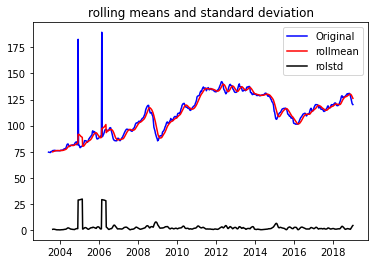

In [43]:
### rolling statistics
orig = plt.plot(df2,color='blue',label='Original')
mean = plt.plot(rollmean, color='red',label='rollmean')
std = plt.plot(rolstd,color='black',label='rolstd')
plt.legend(loc='best')
plt.title('rolling means and standard deviation')
plt.show(block=False)


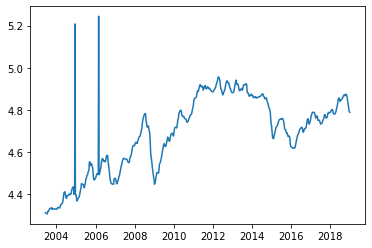

In [16]:
df2_logScale = np.log(df2)
plt.plot(df2_logScale)

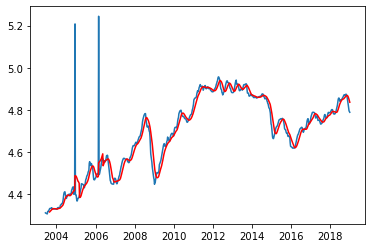

In [17]:
movingAverage = df2_logScale.rolling(window=12).mean()
movingSTD = df2_logScale.rolling(window=12).std()
plt.plot(df2_logScale)
plt.plot(movingAverage, color='red')

In [18]:
datasetLogScaleMinusMovingAverage = df2_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
### remove nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Petrol
Date,
2003-08-26,0.015146
2003-09-01,0.014494
2003-09-08,0.013861
2003-09-15,0.011497
2003-09-22,0.008847
2003-09-29,0.005932
2003-10-06,0.008066
2003-10-13,0.000191
2003-10-20,0.001118


In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    ### determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    ## plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    ## perform Dickey Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-value:",dftest[1])
    print("3.No of Lags",dftest[2])
    print("4.no of observation used for ADF Regression and critical values for calculation",dftest[3])
    print("5.crtical value:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

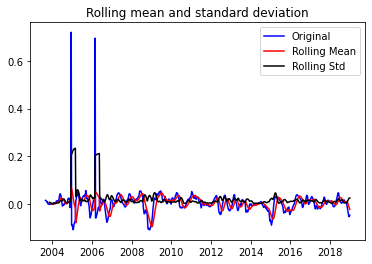

1. ADF:  -8.948478641653946
2. P-value: 8.855105518846837e-15
3.No of Lags 3
4.no of observation used for ADF Regression and critical values for calculation 796
5.crtical value:
	 1% : -3.4385918508847646
	 5% : -2.865177791819505
	 10% : -2.568707096601096


In [20]:
test_stationary(datasetLogScaleMinusMovingAverage['Petrol'])

In [21]:
datasetLogScaleMinusMovingAverage

,Petrol
Date,
2003-08-26,0.015146
2003-09-01,0.014494
2003-09-08,0.013861
2003-09-15,0.011497
2003-09-22,0.008847
...,...
2018-12-03,-0.038439
2018-12-10,-0.048670
2018-12-17,-0.053421


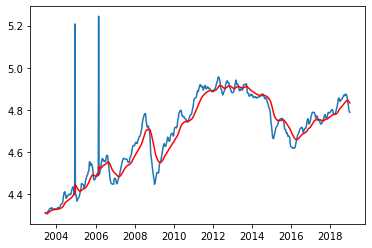

In [22]:
exponentialDecayWeightedAverage = df2_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df2_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

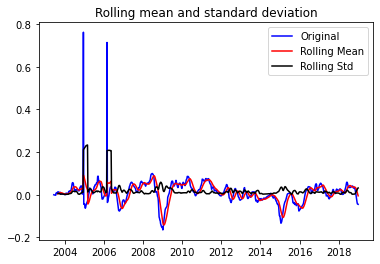

1. ADF:  -5.55624947032179
2. P-value: 1.578516514627941e-06
3.No of Lags 4
4.no of observation used for ADF Regression and critical values for calculation 806
5.crtical value:
	 1% : -3.438489266223099
	 5% : -2.8651325741144573
	 10% : -2.5686830088234025


In [23]:
datasetLogScaleMinusMovingExponentialDecayAverage = df2_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

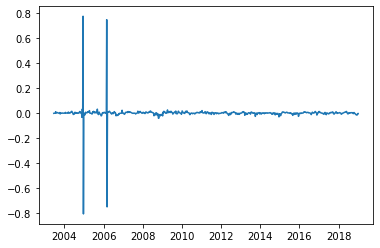

In [24]:
datasetLogDiffShifting = df2_logScale - df2_logScale.shift()
plt.plot(datasetLogDiffShifting)

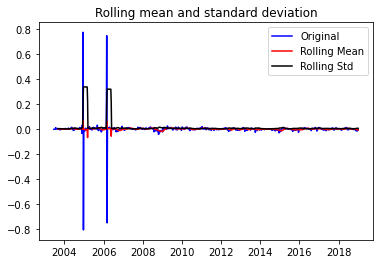

1. ADF:  -17.956458813379705
2. P-value: 2.826759406032024e-30
3.No of Lags 4
4.no of observation used for ADF Regression and critical values for calculation 805
5.crtical value:
	 1% : -3.4384994096285393
	 5% : -2.8651370452361107
	 10% : -2.56868539060993


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompse = seasonal_decompose(np.array(df2['Petrol']),model='multiplicative',freq=12)
ts_plot = ts_decompose.plot()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [ ]:
df2['seasonal'] = ts_decompose.seasonal
df2['trend'] = ts_decompose.trend

In [27]:
from pmdarima import auto_arima
##ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(datasetLogScaleMinusMovingAverage['Petrol'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-2798.730, Time=2.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2656.129, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-2749.344, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2719.404, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2653.676, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2800.177, Time=0.93 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2753.125, Time=1.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-2800.693, Time=0.88 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-2800.380, Time=1.36 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-2786.110, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2801.919, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2718.285, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-2749.164, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2801.576, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(2, 0, 2)   Log Likelihood                1407.409
Date:                Mon, 08 Aug 2022   AIC                          -2804.818
Time:                        00:44:53   BIC                          -2781.395
Sample:                             0   HQIC                         -2795.820
                                - 800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6275      0.121     13.422      0.000       1.390       1.865
ar.L2         -0.7016      0.107     -6.558      0.000      -0.911      -0.492
ma.L1         -1.4115      0.122    -11.605      0.000      -1.650      -1.173
ma.L2          0.5776      0.079      7.286      0.000       0.422       0.733
sigma2         0.0017   1.05e-05    165.094      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1342082.92
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            10.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       202.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
print(df2.shape)
train = df2.iloc[:-30]
test = df2.iloc[-30:]
print(train.shape,test.shape)

(811, 1)
(781, 1) (30, 1)


In [31]:
model = ARIMA(train['Petrol'],order=(2,0,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Petrol   No. Observations:                  781
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2483.537
Date:                Mon, 08 Aug 2022   AIC                           4979.074
Time:                        00:45:21   BIC                           5007.038
Sample:                             0   HQIC                          4989.829
                                - 781                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9075     17.616      5.672      0.000      65.381     134.434
ar.L1          1.5492      0.359      4.310      0.000       0.845       2.254
ar.L2         -0.5509      0.358     -1.540      0.124      -1.252       0.150
ma.L1         -1.2888      0.357     -3.606      0.000      -1.989      -0.588
ma.L2          0.4315      0.257      1.677      0.094      -0.073       0.936
sigma2        33.7183      0.308    109.639      0.000      33.115      34.321
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1562575.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            12.20
Prob(H) (two-sided):                  0.00   Kurtosis:                       220.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,typ='levels')
print(pred)

781    125.557286
782    125.671149
783    125.690092
784    125.656712
785    125.594560
786    125.516665
787    125.430228
788    125.339232
789    125.245879
790    125.151386
791    125.056426
792    124.961370
793    124.866422
794    124.771696
795    124.677252
796    124.583125
797    124.489332
798    124.395883
799    124.302782
800    124.210030
801    124.117630
802    124.025579
803    123.933877
804    123.842524
805    123.751518
806    123.660858
807    123.570543
808    123.480571
809    123.390941
810    123.301651
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

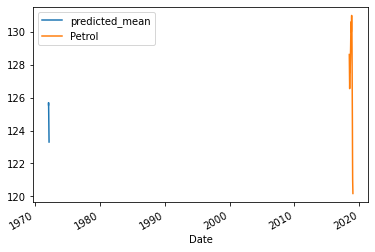

In [33]:
pred.plot(legend=True)
test['Petrol'].plot(legend=True)

In [34]:
test['Petrol'].mean()

127.61833333333334

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Petrol']))
print(rmse)

4.103629924726765


In [36]:
model2 = ARIMA(df2['Petrol'],order=(2,0,2))
model2 = model2.fit()
df2.tail()

,Petrol
Date,
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02
2018-12-24,120.61
2018-12-31,120.18


In [37]:
index_future_dates = pd.date_range(start='2018-12-30',end = '2023-01-31')
pred = model2.predict(start = len(df2),end=len(df2)+1493,typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred.index)

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08',
               ...
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', length=1494, freq='D')


<AxesSubplot:>

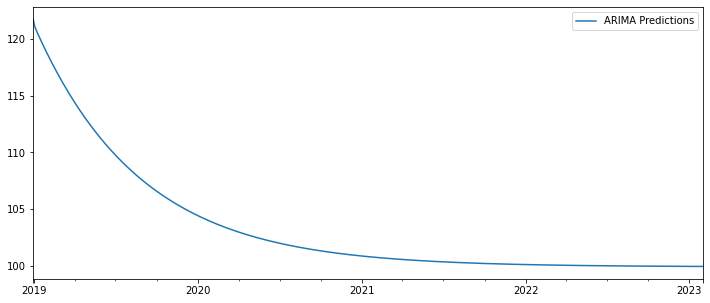

In [38]:
pred.plot(figsize=(12,5),legend=True)

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

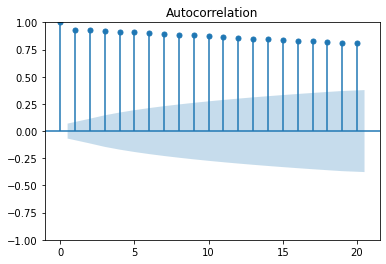

In [40]:
acf_plot = plot_acf(df2.Petrol,lags=20)

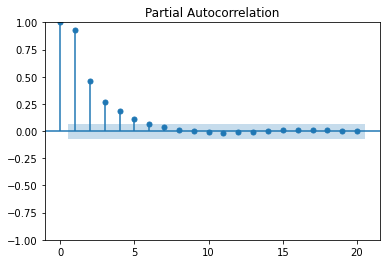

In [41]:
pacf_plot = plot_pacf(df2.Petrol,lags=20)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df1 = pd.read_csv("train_data.csv",index_col='Date', parse_dates=True)
df1


,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
...,...
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02


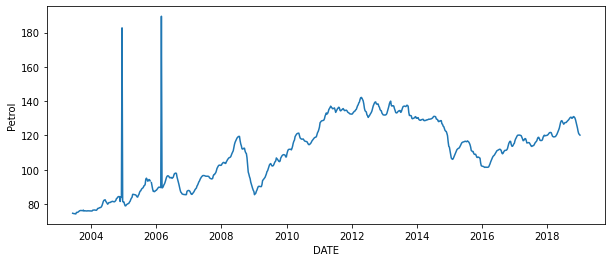

In [4]:
plt.figure(figsize=(10,4))
plt.xlabel('DATE')
plt.ylabel('Petrol')
plt.plot(df1['Petrol (USD)']);

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2003-06-09 to 2018-12-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petrol (USD)  811 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


In [6]:
df2 = df1.dropna()

In [8]:
df2['mavg_12'] = df2['Petrol (USD)'].rolling(window = 12).mean().shift(1)

<ipython-input-8-4416d7e47400>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mavg_12'] = df2['Petrol (USD)'].rolling(window = 12).mean().shift(1)


In [9]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)
df2[['Petrol (USD)', 'mavg_12' ]][36:]

,Petrol (USD),mavg_12
Date,,
2004-02-16,76.44,76.11
2004-02-23,76.38,76.15
2004-03-01,76.32,76.18
2004-03-08,76.73,76.21
2004-03-15,77.39,76.27
...,...,...
2018-12-03,124.30,129.68
2018-12-10,122.37,129.19
2018-12-17,121.02,128.50


No handles with labels found to put in legend.


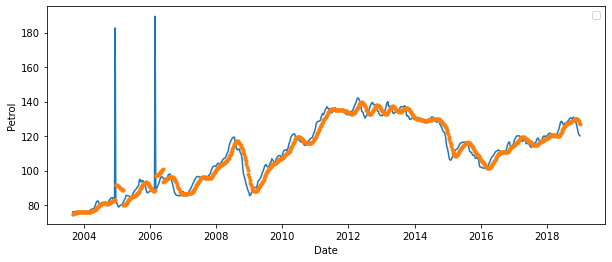

In [10]:
plt.figure(figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("Petrol")
plt.plot(df2['Petrol (USD)'][12:]);
plt.plot(df2['mavg_12'][12:], '.');
plt.legend();

In [11]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [12]:
get_mape(df2['Petrol (USD)'][36:].values , df2['mavg_12'][36:].values)

2.82

In [13]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df2['Petrol (USD)'][36:].values , df2['mavg_12'][36:].values))

6.3064617282252575

In [14]:
(mean_squared_error(df2['Petrol (USD)'][36:].values , df2['mavg_12'][36:].values))

39.7714595295699

In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\PRATYAY\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

C:\Users\PRATYAY\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PRATYAY\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\PRATYAY\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ImportError: Unable to import required dependencies:
numpy: cannot import name 'set_array_function_like_doc' from 'numpy.core.overrides' (C:\Users\PRATYAY\Anaconda3\lib\site-packages\numpy\core\overrides.py)